In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [3]:
df = pd.read_csv("../datasets/dataframe_for_preprocessing.csv")
df.head()

,Unnamed: 0,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0,tcp,http,SF,181,5450,0,0,0,...,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0
1,1,0,tcp,http,SF,239,486,0,0,0,...,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0
2,2,0,tcp,http,SF,235,1337,0,0,0,...,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
3,3,0,tcp,http,SF,219,1337,0,0,0,...,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0
4,4,0,tcp,http,SF,217,2032,0,0,0,...,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   494020 non-null  int64  
 1   duration                     494020 non-null  int64  
 2   protocol_type                494020 non-null  str    
 3   service                      494020 non-null  str    
 4   flag                         494020 non-null  str    
 5   src_bytes                    494020 non-null  int64  
 6   dst_bytes                    494020 non-null  int64  
 7   land                         494020 non-null  int64  
 8   wrong_fragment               494020 non-null  int64  
 9   urgent                       494020 non-null  int64  
 10  hot                          494020 non-null  int64  
 11  num_failed_logins            494020 non-null  int64  
 12  logged_in                    494020 non-null  int64  
 13  lnum_compr

In [9]:
df=df.drop('Unnamed: 0',axis=1)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,494020.0,47.979400,707.747185,0.0,0.00,0.0,0.00,58329.0
src_bytes,494020.0,3025.615744,988219.101225,0.0,45.00,520.0,1032.00,693375640.0
dst_bytes,494020.0,868.530774,33040.034672,0.0,0.00,0.0,0.00,5155468.0
land,494020.0,0.000045,0.006673,0.0,0.00,0.0,0.00,1.0
wrong_fragment,494020.0,0.006433,0.134805,0.0,0.00,0.0,0.00,3.0
urgent,494020.0,0.000014,0.005510,0.0,0.00,0.0,0.00,3.0
hot,494020.0,0.034519,0.782103,0.0,0.00,0.0,0.00,30.0
num_failed_logins,494020.0,0.000152,0.015520,0.0,0.00,0.0,0.00,5.0
logged_in,494020.0,0.148245,0.355343,0.0,0.00,0.0,0.00,1.0
lnum_compromised,494020.0,0.010212,1.798328,0.0,0.00,0.0,0.00,884.0


In [15]:
df.drop_duplicates(inplace=True)
print(df.shape)

(145583, 41)


In [19]:
const_cols = [col for col in df.columns if df[col].min()==df[col].max()]
df.drop(columns = const_cols,inplace=True)

In [21]:
df.shape

(145583, 39)

In [22]:
df.describe(include="object").T

C:\Users\Dell\AppData\Local\Temp\ipykernel_21020\1274302342.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  df.describe(include="object").T


,count,unique,top,freq
protocol_type,145583,3,tcp,130912
service,145583,66,http,62053
flag,145583,11,SF,87456


In [30]:
low_cardinality = ["protocol_type"]
medium_cardinality = ['flag']
high_cardinality = ['service']

In [31]:
def get_numerical(df):
    numerical_cols = []
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        if df[col].nunique(dropna=True) > 2:
            numerical_cols.append(col)
    return numerical_cols

def get_binary(df):
    binary_cols = []
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        if df[col].nunique(dropna=True) == 2:
            binary_cols.append(col)
    return binary_cols

def convert_to_folat(X):
    return X.astype(float)

In [32]:
numerical_cols = get_numerical(df)
binary_cols = get_binary(df)

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, FunctionTransformer
import category_encoders as ce

log_pipeline = Pipeline(
    steps=[
        ('to_float', FunctionTransformer(convert_to_folat, validate=False)),
        ('log', FunctionTransformer(np.log1p, validate=True)),
        ('scaler', RobustScaler())
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        
        ('num_log_scale', log_pipeline, numerical_cols),

        ('binary_pass','passthrough',binary_cols),
        ('low_ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'),
         low_cardinality),

        ('medium_ohe', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'),
         medium_cardinality),

        ('high_binary', ce.BinaryEncoder(), high_cardinality)
    ],
    remainder='drop' 
)

In [34]:
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

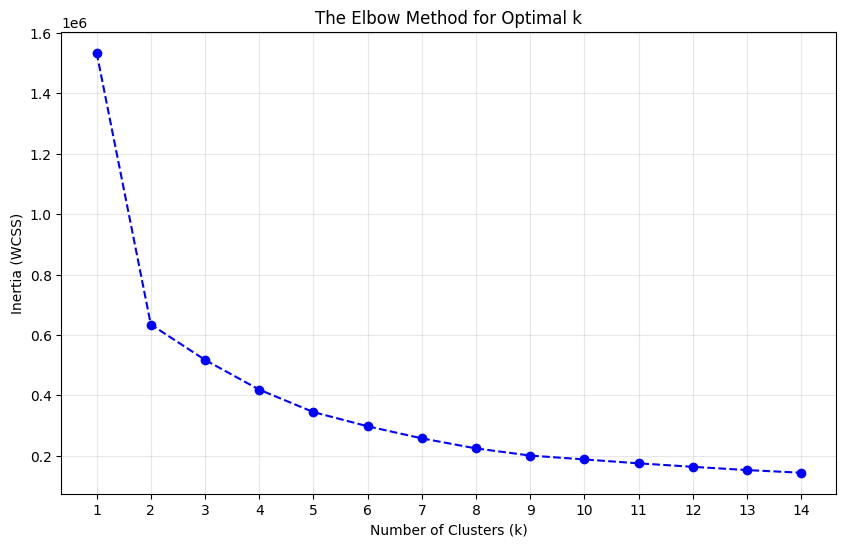

In [57]:
inertia = []
k_range = range(1, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_test_final)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('The Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True, alpha=0.3)
plt.show()

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test = train_test_split(df,test_size=0.2, random_state=42)

In [36]:
X_train_final = preprocessor.fit_transform(X_train)
X_test_final = preprocessor.transform(X_test)

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_final)

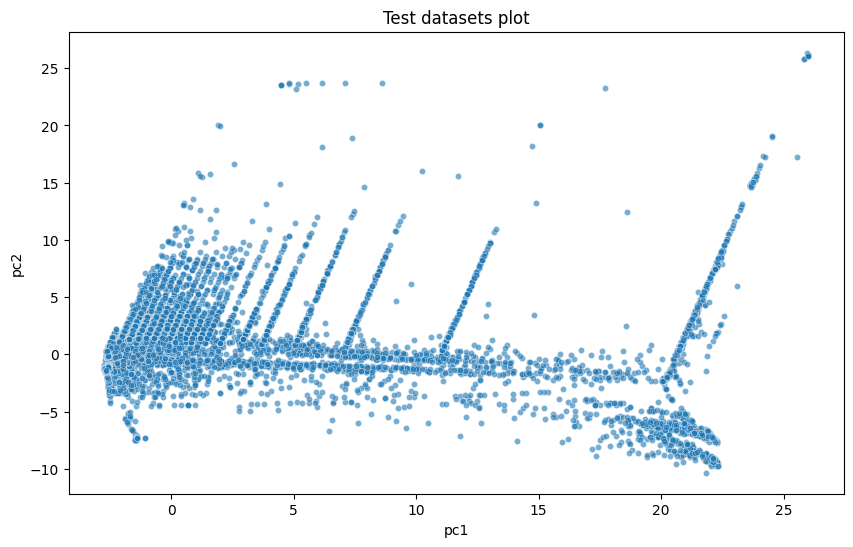

In [40]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    alpha=0.6,
    s=20
)
plt.title("Test datasets plot")
plt.xlabel("pc1")
plt.ylabel("pc2")
plt.show()

In [44]:
kmean =  KMeans(n_clusters=8, random_state=42,n_init=10)
kmean.fit(X_train_final)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",8
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",10
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",42
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [47]:
distances = kmean.transform(X_train_final)
min_distances = np.min(distances, axis=1)
min_distances

array([1.24916069, 2.31982292, 0.86465997, ..., 2.30641172, 2.27929982,
       2.19282139], shape=(116466,))

In [53]:
threshold = np.percentile(min_distances, 90)
y_pred_kmeans = np.where(min_distances > threshold, -1, 1)
print(f"K-Means detected {sum(y_pred_kmeans == -1)} anomalies.")

K-Means detected 11647 anomalies.


## Distribution Distribution Plot to see How Much anamoly the point is

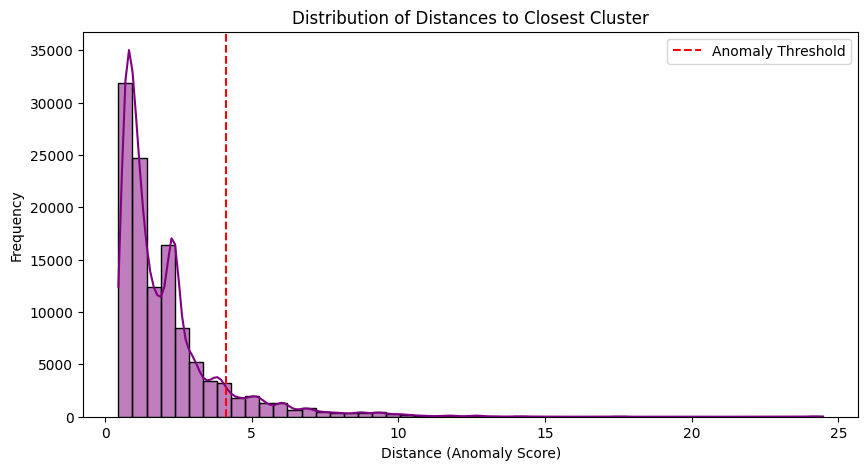

In [58]:
plt.figure(figsize=(10, 5))
sns.histplot(min_distances, bins=50, kde=True, color='purple')
plt.axvline(threshold, color='red', linestyle='--', label='Anomaly Threshold')
plt.title("Distribution of Distances to Closest Cluster")
plt.xlabel("Distance (Anomaly Score)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [61]:
y_pred_kmeans = kmeans.predict(X_test_final)

In [64]:
from sklearn.metrics import silhouette_score
km_silhoutte = silhouette_score(X_test_final,y_pred_kmeans, sample_size=10000)
print(f"k-means score :{km_silhoutte:.4f} ")

k-means score :0.4721 
